# 1.Introduction

## 1.1 Describe solution 1

In [58]:
def count_divisors1(n):
    count= 0
    d=1
    while d<=n:
        if n%d == 0:
            count +=1
        d +=1
    return count

This solution describes a function to count the divisors of a number n. First, we initialize an integer count to zero, which will be used to count how many divisors n has. Then, we use an integer d to iterate from 1 to n in a while loop. Inside the loop, we check if d divides n without a remainder. If it does, we increment the variable count. We continue looping until d is greater than n. Finally, we return the number of divisors n has, which is stored in count.

## 1.2 Describe solution 2

In [59]:
def count_divisors2(n):
    count= 0
    d=1
    while d*d<=n:
        if n%d == 0:
            count +=1 if n / d == d else 2
        d +=1
    return count

This solution describes another function to count the divisors of a number n. Like the previous solution, we initialize an integer count to zero, which will be used to count how many divisors n has. Then, we use an integer d to iterate from 1 to n in a while loop. However, in this solution, we only iterate through possible divisors up to the square root of n.
Inside the loop, we check if d divides n without a remainder. If it does, we check if d is a perfect square. If it is, we increment the variable count by 1 because d is a divisor of n and the square root of n is also a divisor. Otherwise, we add 2 to the variable count because both d and n/d are divisors of n.
We continue looping until d is greater than the square root of n. Finally, we return the number of divisors n has, which is stored in count.

## 1.3 Run the two programs for different values of n and measure which algorithm is faster

In [60]:
%load_ext line_profiler

In [61]:
print("for n = 10")
%timeit count_divisors1(10)
%timeit count_divisors2(10)

for n = 10
1.43 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.17 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [62]:
print("for n = 100")
%timeit count_divisors1(100)
%timeit count_divisors2(100)

for n = 100
16.9 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.67 µs ± 393 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [63]:
print("for n = 100000")
%timeit count_divisors1(100000)
%timeit count_divisors2(100000)

for n = 100000
13.9 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
55 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Here we can notice clearly here that the the second solution is more faster than the first one 

## 1.4 Calculate the number of operations executed by each of the programs for different values of n and generalize for any n

For the first solution : it executes n operations.

For the second solution : it executes square root of n.


# 2 Big-O notation

## 2.1 Prove That $T(n)=O(n^3)$ with $T(n)=3n^3+2n^2+\frac{1}{2}n+7$


By definition $T(n)=O(f(n)) \mbox{ if } f \mbox{ } \exists c,n_0 \mbox{ such as } T(n) \leq c.f(n) \mbox{ }\forall n \geq n_0$


We have that :


\begin{align*}
T(n)=3n^3+2n^2+\frac{1}{2}n+7 & \leq 3n^3+2n^3+\frac{1}{2}n^3+7n^3 \\
& = \frac{25}{2} n^3\\
\end{align*}


$\mbox{ with } n_0= 1 \mbox{ and } c = \frac{25}{2} n^3 \\
\mbox{ Then } T(n)=O(n^3)$



## 2.2 Prove: $ \forall k \geq 1, n^k \mbox{ is not  } O(n^{k-1})$

Onother property of big-O is that $f(n)$ is $O(g(n))$ for nonnegative functions if and only if:
$\lim_{x \rightarrow +\infty} sup \frac{f(x)}{g(x)} < \infty$

let $f(x) = n^k$ and $g(x)= n^{k-1}$
we have that $\lim_{x \rightarrow +\infty} sup \frac{f(x)}{g(x)} = \lim_{x \rightarrow +\infty} sup \frac{n^k}{n^{n-1}} = n \rightarrow +\infty $

We conclude that $n^k \mbox{ is not  } O(n^{k-1})$

# 3 Merge sort

##  3.1 Given two sorted arrays, write a function (with a language of your choice) that merge the two arrays into a single sorted array.

In [64]:
import numpy as np
def merge(A,B):
    C = np.zeros(len(A)+len(B))
    i=0
    j=0
    k=0
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            C[k]= A[i]
            i +=1
            k +=1
        else:
            C[k]= B[j]
            j +=1
            k +=1
    while i < len(A):
        C[k] = A[i]
        i += 1
        k += 1
    while j < len(B):
        C[k] = B[j]
        j += 1
        k += 1
    
    return C

In [65]:
merge(np.array([1,3,6]),np.array([2,5,8,9]))

array([1., 2., 3., 5., 6., 8., 9.])

## 3.2 Analyse the complexity of your function using Big-O notation.

The main while loop runs for at most (len(A) + len(B)) iterations. since we compare one element from each array during each iteration. Therefore, the time complexity of the main loop is O(len(A) + len(B)).

The two while loops that handle remaining elements in A and B take at most len(A) + len(B) iterations combined. Therefore, the time complexity of these two loops is also O(len(A) + len(B)).

Then we conclude that the function is O(len(A) + len(B)).

# 4 The master method

According to the Master Theorem to solve this recurrence relation and determine the time complexity of merge sort.
In the case of merge sort, we have:

$a = 2$, since merge sort divides the array into two halves

$b = 2$, since each subarray has half the size of the original problem

we have $f(n) = O(n^d)$, which corresponds to $d = 1$, because the time it takes to merge two sorted arrays is proportional to n. $a = b^d$, which corresponds to case 1 of the Master Theorem.


Therefore, the time complexity is $O(n log n)$

According to the Master Theorem to solve this recurrence relation and determine the time complexity of binary search.
In the case of merge sort, we have:

$a = 1$, since binary search divides the problem into only two subproblems.

$b = 2$, since the problem is divided by two at each recursive step.

we have $f(n) = O(1)$, which corresponds to $d = 0$, because checking the midpoint and updating the search space takes constant time, regardless of the size of the search space. $a = b^d$, which corresponds to case 1 of the Master Theorem.

Therefore, the time complexity of binary search is $T(n) = O(log n)$

# 5 Bonus

## 5.1 Write a function called merge sort (using a language of your choice) that takes two arrays as parameters and sort those two arrays using the merge sort algorithm

In [107]:
def mergeSort(list1, list2):
    # combine arr1 and arr2 into a single array
    arr = list1 + list2
    n = len(arr)

    # if the array has 1 or 0 elements, it's already sorted
    if n <= 1:
        return arr

    # divide the array in half and recursively sort each half
    mid = n // 2
    left = mergeSort(arr[:mid], [])  # recursively sort left half
    right = mergeSort(arr[mid:], [])  # recursively sort right half

    
    merge_arr = []  # merged array
    i = j = 0  
    # merge the two sorted halves into a single sorted array
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merge_arr.append(left[i])
            i += 1
        else:
            merge_arr.append(right[j])
            j += 1

    # append any remaining elements from the left or right sub-array
    merge_arr += left[i:]
    merge_arr += right[j:]

    return merge_arr

In [108]:
mergesort([1, 5, 4,10], [3, 0, 2])


[0, 1, 2, 3, 4, 5, 10]

## 5.2 Analyse the complexity of your algorithm without using the master theorem


In the divide and conquer method of merge sort, the input array is divided repeatedly in half until we get arrays of size 1, and these sub-arrays are then combined in a sorted way. It takes this division process $O(log(n))$ time to divide the input array in half with each recursive call, and it takes the merging process $O(n)$ time to copy and compare each element. As a result, the merge sort's overall time complexity is $O(nlog(n))$.

## 5.3 Prove the 3 cases of the master theorem

Using the Master Theorem 
We know that $T(n) = a T(n/b) + O(n^k)$ where $a \geq 1$ and $b > 1$

There are three cases of the analysis using master theorem:

If $f(n) = O(n^k)$ where $k < log_b(a) Then T(n) = O(n^log_b(a))$

If $f(n) = O(n^k)$ where $k = log_b(a) Then T(n) = O(n^log(n))$

If $f(n) = O(n^k)$ where $k > log_b(a) Then T(n) = O(n^k))$

Let's now find the case that fit the merge sort algorithm

$T(n) = 2 T(n/2) + cn$

Here $a = 2$ merge sort divides the array into two halves, $b=2$ since each subarray has half the size of the original problem

$O(n^k) = O(n^1) => d=1$

It means that we are in the second case of the master theorem.

Therefore $T(n)= O(nlog(n))$

## 5.4 Choose an algorithm of your choice and analyse it’s complexity using the Big-O notation

In [91]:
# This algorithm search an number on a list and return it's index
def search(num, arr):
    for i in arr:
        if i == num:
            return arr.index(i)
        else:
            pass
arr = [2, 4, 6, 8, 10]

print(search(4, arr))


1


In the best-case scenario of searching for the number 2 in a list, the item is found in the first comparison, resulting in the best-case complexity of O(1). However, if the number 10 is searched, it will be found at the last searched index, which means the algorithm needs to search through all items in the list. In this case, the worst-case complexity becomes O(n).

"Binary Search algorithm"

1. Let max = n-1 and min = 0.

2. The midway is calculated as mid = (min + max) / 2.
3. Return the midpoint if the element at the midpoint is equal to the goal.
4. The target can only be in the left half of the array if the element at the midway is bigger than the target. Step 2 is reached by setting max = mid - 1.
5. The target can only be in the right half of the array if the element at the midway is less than the target. Go to step 2 after setting min = mid + 1. Return -1 if the target cannot be located.

In [125]:
def binary_search(liste, num):
    """
    Performs a binary search on a sorted array to find the target element.

    :param arr: A sorted array.
    :param target: The element to search for.
    :return: The index of the target element if found, otherwise -1.
    """
    min = 0
    max = len(liste) - 1

    while min <= max:
        mid = (min + max) // 2

        if liste[mid] == num:
            return mid
        elif liste[mid] > num:
            max = mid - 1
        else:
            min = mid + 1

    return -1

In [126]:
arr = [2, 4, 6, 8, 10]

print(binary_search(arr, 8))


3


Binary search algorithm's temporal complexity is O (log n). This is due to the fact that the method divides the size of the remaining search space in half at each step, which causes the number of steps required to complete the search to expand exponentially. Binary search is a very effective approach for searching in large datasets since the time complexity increases much more slowly than linearly as the input size (n) increases.

# 6 Matrix multiplication

## 6.1 Write a function using python3 that multiply two matrices A,B (without the use of numpy or any external library).

In [68]:
def multiplication_matrix(A,B):
    m = len(A) # m est le nombre de ligne 
    n = len(B[0]) # le nombre de colonne
    R = [[0] * n for _ in range(m)]
    if m!=n:
        print('Can t multiply A*B')
    else :
        for i in range(m):
            for j in range(n):
                for k in range(len(B)):
                    R[i][j] += A[i][k] * B[k][j]
    return R

In [69]:
A=[[1,2,3],[3,3,7],[3,4,7]]
B=[[1,5,3],[4,1,4],[1,9,7]]
multiplication_matrix(A,B)

[[12, 34, 32], [22, 81, 70], [26, 82, 74]]

## 6.2 What’s the complexity of your algorithm (using big-O nota.on)?

For the time complexity we have that The outer loop iterates m times, the middle loop iterates n times, and the inner loop iterates p times. Within the inner loop, there are constant time operations (multiplying and adding) 
So if we assume that n,m,p are large the time complexity would be $O(n^3)$

## 6.3 Write the same function in C. (bonus)


You can find the c code in the the same folder

## 6.4 Optimize this multiplicatioon and describe each step of your optimisation.

In [70]:
import numpy as np

def multiplication_matrix_optimized(A, B, block_size):
    m, n = A.shape
    q, p = B.shape
    if n != q:
        print("Matrices cannot be multiplied")
        return None
    C = np.zeros((m, p))
    for i in range(0, m, block_size):
        for j in range(0, p, block_size):
            for k in range(0, n, block_size):
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size], B[k:k+block_size, j:j+block_size])
    
    return C

In [71]:
A=np.array([[1,2,3],[3,3,7],[3,4,7]])
B=np.array([[1,5,3],[4,1,4],[1,9,7]])
multiplication_matrix_optimized(A,B,4)

array([[12., 34., 32.],
       [22., 81., 70.],
       [26., 82., 74.]])

For each submatrix multiplication, we need to perform a dot product of two block_size x block_size matrices, which takes $O(block-size^3)$ time. Therefore, the total time complexity of the matrix multiplication operation is $O((n/block_size)^3 * block-size^3)$, which simplifies to $O(n^3/block-size)$ which more fasetr that the naif method.

# Quiz

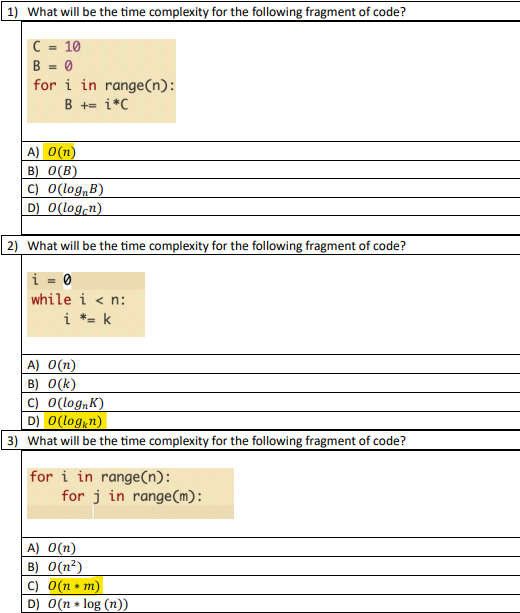